<a href="https://colab.research.google.com/github/liamskydamien/Sci_Prog_Python/blob/main/assignment_5_LiamHess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scientific Programming with Python
## Liam Sky Damien Hess
## Bonn-Rhein-Sieg University of Applied Sciences
### Bonn, Germany
#### Assignment 5

# Assignment: The Performance of Numpy Versus Regular Python Lists

Author: Liam Sky Damien Hess (lhess2s, 9043939)

Date: June 16, 2023

---
Assignment and Goal:

In this assignement I will examine how the use of NumPy[1] can effect the performance of numerical calculations. By calculating the Root-Mean-Squared-Error (RMSE) of a liquids density.

To achieve this goal I will tackle 3 different tasks:
- Creating two user defined functions encoding the RMSE equation
  - One that encodes the function using regular Python lists
  - One that encodes the function maximising its performance using NumPy.
- Read the experiment data and compute the RSME of the data using the prior defined functions
- Evaluate the speed performance of both functions calculating the RMSE using the timeit libary

Problem and Input Data:

The data I use for the following assignments got collected through a study made by a researcher.
The objective of the study is to analyze the characteristics of liquid water. To achieve this, the researcher conducts a computer simulation of a liquid phase consisting of 500 water molecules at a temperature of 30.0° C. The researcher then observes and records the density of the model during a brief simulated time interval. Density is a measurable aspect that indicates the molecular compactness of a chemical system, specifically how closely the molecules are positioned relative to each other.

The Root-Mean-Squared-Error (RMSE) can be calculated using following formular:

$$\sqrt{\frac{1}{n}\sum_{i = 1}^{n}(X_{i}- Y)^2}$$

X = calculated value

Y = experiment value

n = Number of comparisons made

For this experiment Y (the expermiment value) is  $ 0.995659 \frac{g}{cm^3}$ at 30.0 °C [2]





## Imports for this assignment
 - GoogleColab Files
 - NumPy[1]
 - Pandas[3,4]
 - timeit [5]

In [33]:
from google.colab import files
import numpy as np
import pandas as pd
import timeit

## Task 1: Creating user define functions encoding the RMSE equation given above.

### (a) A user defined function using regular Python lists

In [48]:
'''
    This function calculates the RMSE using only built in python functions.
    Args:
        input      - A list of calculated values
        y          - the experimental value

    Returns:
        rmse       - the root-mean-squared-error of the given list

'''
def calculate_RMSE_regular_list(input: list, y: float) -> float:

    ## check the types of the inputs

    if type(input) is not list:
      print("Input is not type list")
      return;

    if type(y) is not float:
      print("Experimental value is not type float")
      return;

    # get amount of comparisons needed
    n = len(input)

    # for each element in input calculate select x and calculate the squared error
    # save the squared error as element in a new list

    differences = [(x - y) for x in input]

    squared_errors = [d ** 2 for d in input]

    mean_squared_error = sum(squared_errors) / n

    rmse = mean_squared_error ** 0.5

    return rmse


### (b) A user defined function using NumPy[1]

In [35]:
'''
    This function calculates the RMSE using NumPy.
    Args:
        input      - A list of calculated values
        y          - the experimental value

    Returns:
        rmse       - the root-mean-squared-error of the given list

'''
def calculate_RMSE_numpy(input: list, y: float) -> float:

    ## check the types of the inputs

    if type(input) is not list:
      print("Input is not type list")
      return;

    if type(y) is not float:
      print("Experimental value is not type float")
      return;

    # save input as NumPy-Array
    input = np.array(input)

    squared_errors = (input - y) ** 2

    mean_squared_error = np.mean(squared_errors)

    rmse = np.sqrt(mean_squared_error)

    return rmse

## Task 2 Load in data and calculate RMSE using both functions

### (a) Read in "density.csv" and define experimental value y = $  0.995659 \frac{g}{m^3}$

In [11]:
## CSV data file can be found at
## https://drive.google.com/file/d/1g-f0VqAMc8d7HbwVZ6C63SRgvvER_gcT/view?usp=sharing

from google.colab import files
uploaded = files.upload()

Saving density.csv to density.csv


In [36]:
## Load uploaded csv-files into list
# Load csv-file
df_density = pd.read_csv('density.csv', header=0, sep=',')

# Remove missing values
df_density = df_density.dropna()

# extract numpy array from pandas dataframe and convert to list
density = list(df_density['Density'].values)

## Define experimental value
experimental_value = 0.995659

### (b) Run function with regular python

In [37]:
rsme = calculate_RMSE_regular_list(input = density,
                                   y = experimental_value)


print(f'The calculated RSME for the data density.csv is {rsme} g / m^3')

The calculated RSME for the data density.csv is 0.021091780857179263 g / m^3


### (c) Run function with NumPy

In [38]:
rsme = calculate_RMSE_numpy(input = density,
                                   y = experimental_value)


print(f'The calculated RSME for the data density.csv is {rsme} g / m^3')

The calculated RSME for the data density.csv is 0.02109178085717924 g / m^3


## Task 3 Evaluate speed performance

### (a) Measuring the speed of the function which uses regular python

In [49]:
# Regular Python
time_regular = timeit.timeit(lambda:calculate_RMSE_regular_list(input = density, y = experimental_value), number=20000)

print(f"Execution time for regular python is: {time_regular} seconds")

Execution time for regular python is: 11.519697529000041 seconds


### (b) Measuring the speed of the function which uses NumPy

In [47]:
# Numpy
time_numpy = timeit.timeit(lambda:calculate_RMSE_numpy(input = density, y = experimental_value), number=20000)

print(f"Execution time for NumPy is: {time_numpy} seconds")

Execution time for NumPy is: 1.5913888270006282 seconds


### Conclusion



The correlation coefficient (r) indicates the strength and direction of the linear relationship. A value closer to zero suggests a weaker relationship. Positive r values indicate a positive correlation, where both variables increase together. Negative r values indicate a negative correlation, where one variable increases as the other decreases. The p-value assesses the significance of the correlation, indicating if it's likely different from zero based on the observed data. [7]

The greatest negative correlation value (r) is found at the categories: Temperature and Latitude

This means that these values have a negative correlation. Therefore if the Latitude or Temperature increases the other decreases and other way around.
This means the lower the latitude, the higher the temperature becomes.
This can be explained through the increase in solar energy closer to the equator. [8]

But its important to note that <b>correlation != causality</b>, but causality like increase on solar energy and therefore increase in temperatures leads to the correlation between heat and the latitude.


## Task 3 Plotting Data
### Create four scatter plots that visualize how latitude (x-axis) and following categories are related (y-axis)

In [ ]:
"""
    This function generates a scatter plot with Latitude as the x-axis and the input as y-axis
    Args:
        y      - The column to reference as y-axis

    Returns:
        rendered scatter plot visualizing the relationship between x and y
    """
def create_scatterplot_for_latitude(y_axis: str, y_label: str):
    ## check if y_axis is a valid string
    if type(y_axis) is not str or type(y_label) is not str:
      ## Print error mesage
      print('Please put in a valid String')
    else:
      ## Set correct title for plot
      title_for_plot = 'Relation between Latitude and ' + y_axis

      ## Generate plot
      df_weather.plot(x='Latitude',
                      y=y_axis,
                      kind='scatter',
                      title=title_for_plot,
                      xlabel='Latitude',
                      ylabel=y_label,
                      grid=True,
                    )

#### 1. Relation between Latitude and Clouds

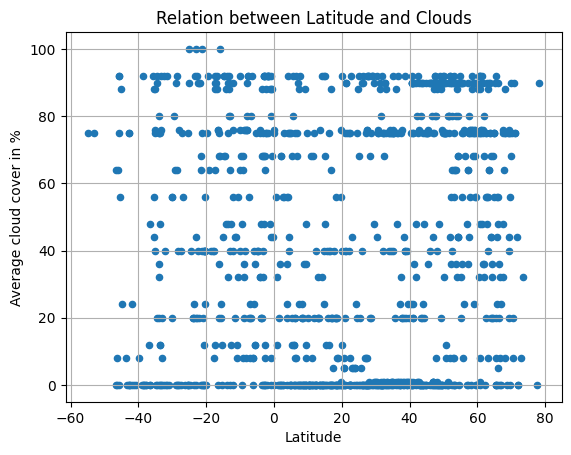

In [ ]:
## Run custom function to create scatter plot
create_scatterplot_for_latitude('Clouds', 'Average cloud cover in %')

There seems to be little to no correlation between Latitude and Clouds.

#### 2. Relation between Latitude and Humidity

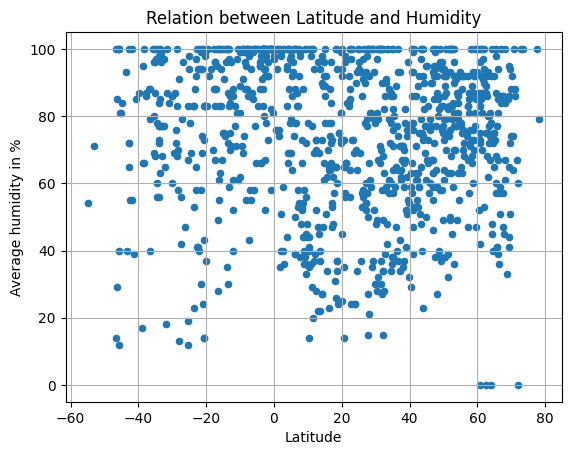

In [ ]:
## Run custom function to create scatter plot
create_scatterplot_for_latitude('Humidity', 'Average humidity in %')

There seems to be little to no correlation between Latitude and Humidity.

#### 3. Relation between Latitude and Temperature

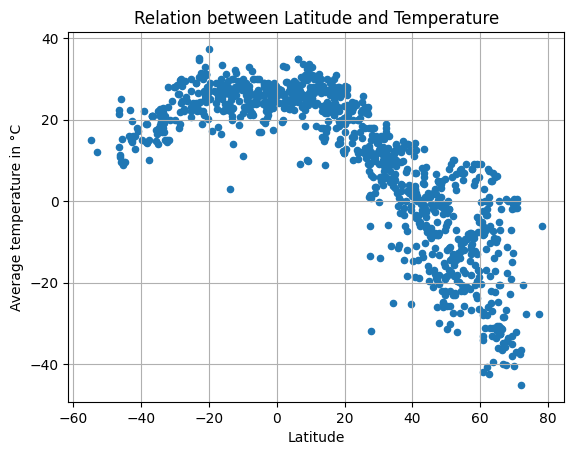

In [ ]:
## Run custom function to create scatter plot
create_scatterplot_for_latitude('Temperature', 'Average temperature in °C')

The correlation between Latitude and Temperature is visible in this plot clearly visible. But it seems to be a non-linear correlation, since the temperatue decreases with increasing or decreasing latitude.

The average temperature reaches its peak on the equator (Latitude = 0°).

#### 4. Relation between Latitude and Wind

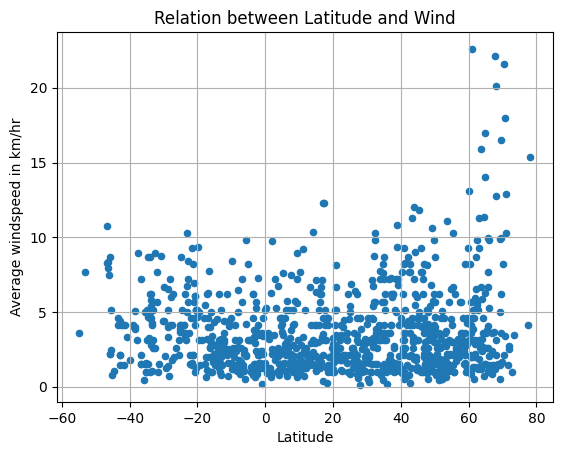

In [ ]:
## Run custom function to create scatter plot
create_scatterplot_for_latitude('Wind', 'Average windspeed in km/hr')

There seems to be little to no correlation between Latitude and Wind. Its visible that in most arease is a wind speed between 0 to 10 $\frac{km}{hr}$.

But the wind speeds seems to increase in the northern regions.

## Task 4 Sort and Save data

### 1. Sort data based on the latitude category

In [ ]:
## Sort data in the df_weather dataframe based on latitude
sorted_df_weather = df_weather.sort_values(by='Latitude')

## Display sorted dataframe
sorted_df_weather

,Country,City,Country Abbreviation,Longitude,Latitude,Temperature,Humidity,Wind,Clouds
927,Argentina,Ushuaia,AR,-68.31,-54.81,15.09,54.0,3.60,75.0
1104,Chile,Punta Arenas,CL,-70.91,-53.16,12.00,71.0,7.70,75.0
924,New zealand,Bluff,NZ,168.33,-46.60,13.32,100.0,10.77,64.0
919,Argentina,Lujan,AR,-67.67,-46.57,22.25,14.0,8.27,0.0
1048,Argentina,Mar del Plata,AR,-67.52,-46.43,21.35,29.0,8.37,0.0
...,...,...,...,...,...,...,...,...,...
584,Russian federation,Khatanga,RU,102.47,71.98,-36.51,60.0,2.72,0.0
825,Greenland,Upernavik,GL,-56.15,72.79,-20.68,100.0,0.97,8.0
675,Russian federation,Dikson,RU,80.55,73.51,-27.61,100.0,3.47,32.0
5,Greenland,Qaanaaq,GL,-69.36,77.48,-27.78,100.0,4.12,0.0


## 2. Save sorted dataframe to a new csv-formatted file

In [ ]:
## Save dataframe as csv with a ;-separator
sorted_df_weather.to_csv('weather_data_sorted_by_latitude.csv', sep=';' ,index=False)

## References:

[1] Shen, B.-W.; Pielke, R.A.; Zeng, X.; Cui, J.; Faghih-Naini, S.; Parxon, W. and Atlas, R. Three Kinds of Butterfly Effects within Lorenz Models Encyclopedia, 2 (2022) 1250-1259 (https://doi.org/10.3390/encyclopedia2030084)

[2] Lehner, M. and Rotach, M.W. Current Challenges in Understanding and Predicting Transport and Exchange in the Atmosphere over Mountainous Terrain Atmosphere, 9 (2018) 276 (https://doi.org/10.3390/atmos9070276)

[3] joelsotelods, "Weather Data Analysis", GitHub repository. https://github.com/joelsotelods/weather-data-analysis. Online; Accessed on May 26, 2023.

[4] OpenWeather, Global Services Weather Forecasts, Nowcasts and History in Fast and Elegant Way. https://openweathermap.org/. Online; accessed on May 26, 2023.

[5] The Pandas Development Team pandas-dev/pandas. Pandas. https://pandas.pydata.org/. Online; Accessed on May 26, 2023.

[6] Pandas user guide, https://pandas.pydata.org/docs/user_guide/index.html. Online; Accessed on May 26, 2023.

[7] Wikipedia's contributors, Correlation https://en.wikipedia.org/wiki/Correlation. Online; Accessed on May 26, 2023.

[8] Study.com, "Why is it warmer near the equator?", https://homework.study.com/explanation/why-is-it-warmer-near-the-equator.html. Accessed on May 26, 2023.